# Circulators using non-reciprocal phasers

## A. Symmetrical

In [3]:
from sympy import *
from IPython.display import display, Math, Latex

init_printing()


m, n = symbols('m n')
A = Matrix([[1, -2], [2, -1]])


display(Math('A = ' + latex(A)))
b = Matrix([2*m*pi, (2*n+1)*pi])


display(Math(r'b=' + latex(b)))

x = A.inv()*b
display(Math('x = ' + latex(x)))

x_01 = simplify(x[0] + x[1])
display(Math('x_0 + x_1 = ' + latex(x_01)))
print latex(x_01)

for m1 in range(-3,3):
    for n1 in range(-3,3):
        if( 0<=x.subs([(n,n1), (m,m1)])[0]<2*pi and 0<=x.subs([(n,n1), (m,m1)])[1]<2*pi):
            print 'm=:', m1, ' n=:', n1
            display(Math(latex(x.subs([(n,n1), (m,m1)]))))
    


\pi \left(- 2 m + 2 n + 1\right)
m=: -1  n=: -1


m=: -1  n=: 0


m=: 0  n=: 0


## B. Asymmetrical

In [8]:
from sympy import *
from Electromagnetics.Misc import *
from IPython.display import display, Math, Latex

#x, y, z, u, v, w = symbols('x y z u v w')
init_printing()


m, n, p, q, r, s = symbols('m n p q r s')
b = Matrix([2*m*pi, (2*n+1)*pi, 2*p*pi, (2*q+1)*pi, 2*r*pi, (2*s+1)*pi])
"""
# alpha_1 ... alpha_6 convention
A = Matrix([[ 1, 0, 0,-1, 0,-1], 
            [ 1, 0, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 1, 0],
            [ 0,-1, 0,-1, 1, 0],
            [ 1, 0, 0,-1, 1, 0]]) 
"""
# alpha_1^+- ... alpha_3^+- convention
A = Matrix([[-1, 0,-1, 0, 0, 1], 
            [ 0, 1,-1, 0, 0, 1],
            [ 0, 1,-1, 0,-1, 0],
            [ 0, 1, 0, 1,-1, 0],
            [-1, 0, 0, 1,-1, 0],
            [-1, 0, 0, 1, 0, 1]])


A2, b2, x, cond = solve_linear_system_nontrivial(A, b, 'z')
cond = [cond[i].simplify() for i in range(len(cond))]

display(Math('A = '+latex(A)))
print('A: \n', latex(A))

display(Math('b = '+latex(b)))
print('b: \n', latex(b))

display(Math('\\text{conditions} = '+latex(simplify(cond))))
print('cond: \n', latex(simplify(cond)))


display(Math('A2 = '+latex(A2)))
print('A2: \n', latex(A2))

display(Math('b2 = '+latex(b2)))
print('b2: \n', latex(b2))


r_sub = solve(cond[1], r)[0]
print('r_sub: ', latex(r_sub))
s_sub = solve(cond[0], s)[0]
print('s_sub: ', latex(s_sub))

x = x.subs([(r, r_sub), (s, s_sub)])
x.simplify()
display(Math('x = '+latex(x)))
print('x: \n', latex(x))

Ax_b=simplify((A*x-b).subs([(r, r_sub), (s, s_sub)]))
display(Math('Ax-b = '+latex(Ax_b)))

x_simp = x.subs([(m,0), (n,0), (p,0), (q,0)])
display(Math('x = '+latex(x_simp)))
print('x_simp: \n', latex(x_simp))

display(Math(latex(x_simp.subs([(Symbol('z0'), pi/2), (Symbol('z1'), pi/2)]))))

<IPython.core.display.Math object>

A: 
 \left[\begin{matrix}-1 & 0 & -1 & 0 & 0 & 1\\0 & 1 & -1 & 0 & 0 & 1\\0 & 1 & -1 & 0 & -1 & 0\\0 & 1 & 0 & 1 & -1 & 0\\-1 & 0 & 0 & 1 & -1 & 0\\-1 & 0 & 0 & 1 & 0 & 1\end{matrix}\right]


<IPython.core.display.Math object>

b: 
 \left[\begin{matrix}2 \pi m\\\pi \left(2 n + 1\right)\\2 \pi p\\\pi \left(2 q + 1\right)\\2 \pi r\\\pi \left(2 s + 1\right)\end{matrix}\right]


<IPython.core.display.Math object>

cond: 
 \left [ 2 \pi \left(- m + p - q + s\right), \quad 2 \pi \left(- m + n - q + r\right)\right ]


<IPython.core.display.Math object>

A2: 
 \left[\begin{matrix}1 & 0 & 0 & -1 & 0 & -1\\0 & -1 & 0 & -1 & 0 & -1\\0 & 0 & 1 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 1\\0 & 0 & 0 & 0 & 0 & 0\end{matrix}\right]


<IPython.core.display.Math object>

b2: 
 \left[\begin{matrix}- \pi \left(2 s + 1\right)\\2 \pi m - \pi \left(2 n + 1\right) - \pi \left(2 s + 1\right)\\- 2 \pi m + \pi \left(2 s + 1\right)\\- 2 \pi m + 2 \pi p - \pi \left(2 q + 1\right) + \pi \left(2 s + 1\right)\\- 2 \pi m + \pi \left(2 n + 1\right) - \pi \left(2 q + 1\right) + \pi \left(2 s + 1\right)\\- 2 \pi m + 2 \pi r + \pi \left(2 n + 1\right) - \pi \left(2 q + 1\right)\end{matrix}\right]
r_sub:  m - n + q
s_sub:  m - p + q


<IPython.core.display.Math object>

x: 
 \left[\begin{matrix}z_{0} + z_{1} - \pi \left(2 m - 2 p + 2 q + 1\right)\\2 \pi n - 2 \pi p + 2 \pi q - z_{0} - z_{1} + 2 \pi\\- 2 \pi p + 2 \pi q - z_{0} + \pi\\z_{0}\\2 \pi n - 2 \pi p - z_{1} + \pi\\z_{1}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

x_simp: 
 \left[\begin{matrix}z_{0} + z_{1} - \pi\\- z_{0} - z_{1} + 2 \pi\\- z_{0} + \pi\\z_{0}\\- z_{1} + \pi\\z_{1}\end{matrix}\right]


<IPython.core.display.Math object>

## 4 ports symmetrical

In [2]:
from sympy import *
from Electromagnetics.Misc import *
from IPython.display import display, Math, Latex

init_printing()


m, n, p = symbols('m n p')
A = Matrix([[1, -3], 
            [2, -2],
            [3, -1]])

b = Matrix([2*m*pi, (2*n+1)*pi, (2*p+1)*pi])

display(Math('A = ' + latex(A)))
display(Math(r'b=' + latex(b)))

A2, b2, x, cond = solve_linear_system_nontrivial(A, b, 'z')
cond = [cond[i].simplify() for i in range(len(cond))]

display(Math('A_2 = ' + latex(A2)))
display(Math(r'b_2=' + latex(b2)))


display(Math('x = ' + latex(x)))
display(Math('\\text{conditions} = '+latex(simplify(cond))))

print 'NO SOLUTION'

NO SOLUTION


## 4 port asymmetric

In [3]:
from sympy import *
from Electromagnetics.Misc import *
from IPython.display import display, Math, Latex

#x, y, z, u, v, w = symbols('x y z u v w')
init_printing()


m1, m2, m3, n1, n2, n3, p1, p2, p3, q1, q2, q3 = symbols('m1 m2 m3 n1 n2 n3 p1 p2 p3 q1 q2 q3')
b = Matrix([2*m1*pi, (2*m2+1)*pi, (2*m3+1)*pi, 
            2*n1*pi, (2*n2+1)*pi, (2*n3+1)*pi,
            2*p1*pi, (2*p2+1)*pi, (2*p3+1)*pi,
            2*q1*pi, (2*q2+1)*pi, (2*q3+1)*pi])

A = Matrix([[ 1, 0, 0,-1, 0,-1, 0,-1], 
            [ 1, 0, 1, 0, 0,-1, 0,-1],
            [ 1, 0, 1, 0, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 0,-1, 0,-1],
            [ 0,-1, 1, 0, 1, 0, 0,-1],
            [ 0,-1, 1, 0, 1, 0, 1, 0],
            [ 0,-1, 0,-1, 1, 0, 0,-1],
            [ 0,-1, 0,-1, 1, 0, 1, 0],
            [ 1, 0, 0,-1, 1, 0, 1, 0],
            [ 0,-1, 0,-1, 0,-1, 1, 0],
            [ 1, 0, 0, 1, 0,-1, 1, 0],
            [ 1, 0, 1, 0, 0,-1, 1, 0]])

A2, b2, x, cond = solve_linear_system_nontrivial(A, b, 'z')
cond = [cond[i].simplify() for i in range(len(cond))]

display(Math('A = '+latex(A)))
display(Math('b = '+latex(b)))


display(Math('A_2 = ' + latex(A2)))
display(Math(r'b_2=' + latex(b2)))


display(Math('x = ' + latex(x)))
display(Math('\\text{conditions} = '+latex(simplify(cond))))

print 'NO SOLUTION'

NO SOLUTION


## Circulator Symmetric S-Matrix

In [13]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from IPython.display import display, Math, Latex

x, y, z, u, v, w = symbols('x y z u v w')
init_printing()

phi_p = Symbol('\\phi^+')
phi_m = Symbol('\\phi^-')

Snet = EmNetwork()

S_junc = Matrix([[x, y, y],
                 [y, z, w],
                 [y, w, z]])
S_junc = S_junc.subs([(x, -1/3), (y, 2/3), (z, -1/3), (w, 2/3)])



S_phaser = Matrix([[0, exp(-I*phi_m)],
                   [exp(-I*phi_p), 0]]).evalf()
S_phaser = S_phaser.subs([(phi_p, pi/3), (phi_m, 2*pi/3)])

Snet.addComponent(S_junc, "junction", 3)
Snet.addComponent(S_phaser, "phaser", 3)

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))
#print latex(S)


Snet.addConnection("junction_0", 1, "phaser_0", 0)
Snet.addConnection("junction_0", 2, "phaser_2", 1)

Snet.addConnection("junction_1", 1, "phaser_1", 0)
Snet.addConnection("junction_1", 2, "phaser_0", 1)

Snet.addConnection("junction_2", 1, "phaser_2", 0)
Snet.addConnection("junction_2", 2, "phaser_1", 1)


S = Snet.getTotalScatteringMatrix().evalf()
display(Math('S = ' + latex(S)))

S = Matrix([[abs(S[i,j]) for i in range(S.rows)] for j in range(S.cols)])
display(Math('S = ' + latex(S.evalf())))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Circulator asymmetric S-Matrix

In [2]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from IPython.display import display, Math, Latex

#x, y, z, u, v, w = symbols('x y z u v w')
init_printing()

phi_p = Symbol('\\phi^+')
phi_m = Symbol('\\phi^-')

Snet = EmNetwork()

"""
S_junc = Matrix([[0, 1/sqrt(2), 1/sqrt(2)],
                 [1/sqrt(2),  -Rational(1,2), Rational(1,2)],
                 [1/sqrt(2),  Rational(1,2), -Rational(1,2)]])
"""


S_junc = Matrix([[Rational(-1,3),  Rational(2,3),  Rational(2,3)],
                 [Rational(2,3),  Rational(-1,3),  Rational(2,3)],
                 [Rational(2,3),  Rational(2,3),  Rational(-1,3)]])


S_phaser0 = Matrix([[0, exp(-I*pi/2)],
                   [exp(-I*pi/2), 0]])
S_phaser1 = Matrix([[0, -1],
                    [1, 0]])
S_phaser2 = Matrix([[0, exp(-I*pi/2)],
                   [exp(-I*pi/2), 0]])

Snet.addComponent(S_junc, "junction", 3)
Snet.addComponent(S_phaser0, "phaser_0")
Snet.addComponent(S_phaser1, "phaser_1")
Snet.addComponent(S_phaser2, "phaser_2")

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))


Snet.addConnection("junction_0", 1, "phaser_0", 0)
Snet.addConnection("junction_0", 2, "phaser_2", 1)

Snet.addConnection("junction_1", 1, "phaser_1", 0)
Snet.addConnection("junction_1", 2, "phaser_0", 1)

Snet.addConnection("junction_2", 1, "phaser_2", 0)
Snet.addConnection("junction_2", 2, "phaser_1", 1)

S = Snet.getTotalScatteringMatrix()
#display(Math('S = ' + latex(S)))

#S = S.subs([(phi_p, 2*pi/3), (phi_m, pi/3)])
S = Matrix([[S[i,j].expand() for i in range(S.rows)] for j in range(S.cols)])
display(Math('S = ' + latex(S)))

for i in range(S.cols):
    print( (S.col(i).H*S.col(i))[0].expand() )


1
1
1


## 4-port circulator with magic Ts

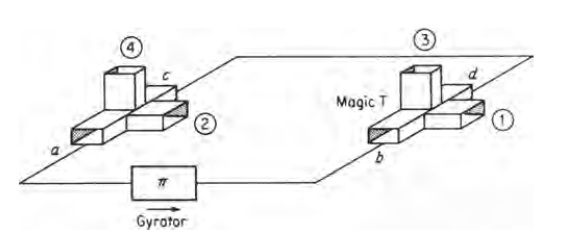

In [41]:
from IPython.display import Image


img = Image(filename='images/circulators/circulator-magic-t.png')

display(img)

In [25]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from IPython.display import display, Math, Latex

#x, y, z, u, v, w = symbols('x y z u v w')
init_printing()

phi_p = Symbol('\\phi^+')
phi_m = Symbol('\\phi^-')

Snet = EmNetwork()


MT_junc = Matrix([[0, 1, 1, 0],
                  [1, 0, 0, 1],
                  [1, 0, 0,-1],
                  [0, 1,-1, 0]])

MT_junc = 1/sqrt(2)*MT_junc


S_gyr = Matrix([[0,  1],
                [-1, 0]])

Snet.addComponent(MT_junc, "magic T", 2)
Snet.addComponent(S_gyr, "gyrator")

S = Snet.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))


Snet.addConnection("magic T_0", 2, "gyrator", 1)
Snet.addConnection("magic T_1", 2, "gyrator", 0)
Snet.addConnection("magic T_0", 1, "magic T_1", 1)


S = Snet.getTotalScatteringMatrix()

S = Matrix([[S[i,j].expand() for i in range(S.rows)] for j in range(S.cols)])
display(Math('S = ' + latex(S)))


1
1
1
1


### Toshiro's circulator

In [ ]:
from sympy import *
from Electromagnetics.NetworkAnalysis_sym import *
from IPython.display import display, Math, Latex

#x, y, z, u, v, w = symbols('x y z u v w')

theta = symbols(r'\theta', real=True)

S_RR = EmNetwork()



S_junc = Matrix([[0, 1/sqrt(2), 1/sqrt(2)],
                 [1/sqrt(2),  -Rational(1,2), Rational(1,2)],
                 [1/sqrt(2),  Rational(1,2), -Rational(1,2)]])


"""
S_junc = Matrix([[Rational(-1,3),  Rational(2,3),  Rational(2,3)],
                 [Rational(2,3),  Rational(-1,3),  Rational(2,3)],
                 [Rational(2,3),  Rational(2,3),  Rational(-1,3)]])
"""

S_tl1 = Matrix([[0, exp(-I*theta)],
               [exp(-I*theta), 0]])
S_tl2 = Matrix([[0, exp(-I*2*theta)],
               [exp(-I*2*theta), 0]])

S_fet = Matrix([[0, -1],
                [1, 0]])



S_RR.addComponent(S_junc, "junction", 5)
S_RR.addComponent(S_tl1, "tl1", 4)
S_RR.addComponent(S_tl2, "tl2")
S_RR.addComponent(S_fet, "fet")

S = S_RR.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))


S_RR.addConnection("junction_0", 1, "tl1_0", 0)
S_RR.addConnection("tl1_0", 1, "junction_1", 2)

S_RR.addConnection("junction_1", 1, "tl1_1", 0)
S_RR.addConnection("tl1_1", 1, "junction_2", 2)

S_RR.addConnection("junction_2", 1, "tl1_2", 0)
S_RR.addConnection("tl1_2", 1, "junction_3", 2)

S_RR.addConnection("junction_3", 1, "tl1_3", 0)
S_RR.addConnection("tl1_3", 1, "junction_4", 2)

S_RR.addConnection("junction_4", 1, "tl2", 0)
S_RR.addConnection("tl2", 1, "junction_0", 2)

S_RR.addConnection("junction_3", 0, "fet", 0)
S_RR.addConnection("fet", 1, "junction_1", 0)



S = S_RR.getTotalScatteringMatrix()
display(Math('S = ' + latex(S)))

#S = Matrix([[S[i,j].simplify() for i in range(S.rows)] for j in range(S.cols)])
#display(Math('S = ' + latex(S)))


<IPython.core.display.Math object>